# Round 2
## Dealing with Data

In [1]:
import pandas as pd
import numpy as np


In [2]:
mdata = pd.read_csv('marketing_customer_analysis.csv')
mdata.head()

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [3]:
#Show the dataframe shape.


mdata.shape
print("The dataframe shape is:", mdata.shape)

The dataframe shape is: (10910, 26)


In [4]:
# showing columns 

mdata.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [5]:
# Standardize header names. Lowercasing all header to standardise them.

cols = []
for column in mdata.columns:
    cols.append(column.lower())
cols
mdata.columns = cols
mdata.columns

Index(['unnamed: 0', 'customer', 'state', 'customer lifetime value',
       'response', 'coverage', 'education', 'effective to date',
       'employmentstatus', 'gender', 'income', 'location code',
       'marital status', 'monthly premium auto', 'months since last claim',
       'months since policy inception', 'number of open complaints',
       'number of policies', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'total claim amount', 'vehicle class', 'vehicle size',
       'vehicle type'],
      dtype='object')

In [6]:
#dropping the unnamed column

mdata = mdata.drop(['unnamed: 0'], axis=1)
mdata.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [7]:
#mdata.dtypes

In [8]:
# Showing numerical data types

mdata.select_dtypes(int)


,income,monthly premium auto,months since policy inception,number of policies
0,48029,61,52,9
1,0,64,26,1
2,22139,100,31,2
3,49078,97,3,2
4,23675,117,31,7
...,...,...,...,...
10905,0,253,40,7
10906,61146,65,68,6
10907,39837,201,63,2
10908,64195,158,27,6


In [9]:
# Showing numerical data types

mdata.select_dtypes(float)


,customer lifetime value,months since last claim,number of open complaints,total claim amount
0,4809.216960,7.0,0.0,292.800000
1,2228.525238,3.0,0.0,744.924331
2,14947.917300,34.0,0.0,480.000000
3,22332.439460,10.0,0.0,484.013411
4,9025.067525,NaN,NaN,707.925645
...,...,...,...,...
10905,15563.369440,NaN,NaN,1214.400000
10906,5259.444853,7.0,0.0,273.018929
10907,23893.304100,11.0,0.0,381.306996
10908,11971.977650,0.0,4.0,618.288849


In [10]:
# Showing categorical data types
mdata.select_dtypes(object)


,customer,state,response,coverage,education,effective to date,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


In [11]:
#checking sum of null values in each column
display(mdata.isna().sum())

#checking percentage of null values

round(mdata.isna().sum()/len(mdata),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(mdata.isna().sum()/len(mdata),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

,header_name,percent_nulls
0,customer,0.00
1,state,5.78
2,customer lifetime value,0.00
3,response,5.78
4,coverage,0.00
5,education,0.00
6,effective to date,0.00
7,employmentstatus,0.00
8,gender,0.00
9,income,0.00


In [12]:
# vehicle type has most null values, so we decided to look at this closely to observe unique values. 
# for the rest of the columns we don't consider >6% to be a large number, so we decide to replace that with the mean where there are numerical columns 
# for the categorical columns, we will replace it with the mode value.

In [13]:
mdata['vehicle type'].unique()
mdata['vehicle type'].value_counts()


A    5428
Name: vehicle type, dtype: int64

In [14]:
# vehicle type has most null values but also only one other unique value, so we decided to replace the null values with 'M' for Manual

mdata['vehicle type'] = mdata['vehicle type'].fillna('M')

#mdata['vehicle type'].value_counts(dropna=False)
mdata.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M


In [15]:
display(mdata['months since last claim'].unique())
display(mdata['months since last claim'].value_counts())

display(mdata['number of open complaints'].unique())
display(mdata['number of open complaints'].value_counts())

# we can see here that there are no float values in the series so we can treat the null values in these columns as int.


array([ 7.,  3., 34., 10., nan,  2.,  8., 35., 33., 19., 13.,  5., 24.,
       25.,  6., 20., 26., 14.,  9., 29., 11.,  1., 18., 16., 30., 12.,
        4., 22., 31., 21., 28., 17., 15., 32., 23., 27.,  0.])

3.0     426
6.0     394
1.0     386
7.0     378
4.0     373
2.0     368
5.0     355
0.0     354
10.0    346
16.0    333
11.0    331
15.0    323
13.0    320
8.0     315
12.0    307
17.0    299
14.0    299
9.0     277
23.0    276
19.0    276
25.0    269
21.0    267
18.0    257
20.0    254
22.0    246
24.0    237
29.0    234
28.0    227
31.0    221
26.0    211
27.0    208
30.0    201
34.0    199
33.0    198
35.0    157
32.0    155
Name: months since last claim, dtype: int64

array([ 0., nan,  3.,  1.,  2.,  4.,  5.])

0.0    8160
1.0    1145
2.0     414
3.0     324
4.0     166
5.0      68
Name: number of open complaints, dtype: int64

In [16]:
mode_mslc = mdata['months since last claim'].mode()
display(mode_mslc)
mdata['months since last claim'] = mdata['months since last claim'].fillna(3)

0    3.0
Name: months since last claim, dtype: float64

In [17]:
mode_nooc = mdata['number of open complaints'].mode()
display(mode_nooc)
mdata['number of open complaints'] = mdata['number of open complaints'].fillna(0)

0    0.0
Name: number of open complaints, dtype: float64

In [18]:
#checking 'state' for null values 
mdata['state'].isnull().values.any()

True

In [19]:
# for the categorical columns, we will replace it with the most common value value. 

mdata['state'].unique()
mdata['state'].value_counts()

# replacing values for the column 'state'

mdata['state'] = mdata['state'].fillna('California')


In [20]:
# for the categorical columns, we will replace it with the most common value value. 

mdata['response'].unique()
mdata['response'].value_counts()
# replacing values for the column 'response'
mdata['response'] = mdata['response'].fillna('No')


In [21]:

# for the categorical columns, we will replace it with the most common value value. 

mdata['vehicle class'].unique()
mdata['vehicle class'].value_counts()

# replacing values for the 'vehicle class'
mdata['vehicle class'] = mdata['vehicle class'].fillna('Four-Door Car')


In [22]:

# for the categorical columns, we will replace it with the most common value value. 

mdata['vehicle size'].unique()
mdata['vehicle size'].value_counts()

# replacing values for the 'vehicle size'

mdata['vehicle size'] = mdata['vehicle size'].fillna('Medsize')


In [23]:
mdata.isna().sum()

customer                         0
state                            0
customer lifetime value          0
response                         0
coverage                         0
education                        0
effective to date                0
employmentstatus                 0
gender                           0
income                           0
location code                    0
marital status                   0
monthly premium auto             0
months since last claim          0
months since policy inception    0
number of open complaints        0
number of policies               0
policy type                      0
policy                           0
renew offer type                 0
sales channel                    0
total claim amount               0
vehicle class                    0
vehicle size                     0
vehicle type                     0
dtype: int64

# Datetime Conversion

In [24]:
import datetime

mdata['effective to date']= pd.to_datetime(mdata['effective to date'], errors='coerce')
display(mdata.head())

mdata['effective to date'][0]


,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M


Timestamp('2011-02-18 00:00:00')

In [25]:
mdata['month'] = pd.DatetimeIndex(mdata['effective to date']).month
mdata.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1


In [26]:
#filtering!
mdata[mdata['month'] < 4]
mdata.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1


In [27]:
mdata['month']

0        2
1        1
2        2
3        1
4        1
        ..
10905    1
10906    1
10907    2
10908    2
10909    1
Name: month, Length: 10910, dtype: int64

In [28]:
# this confirms that all values are less than 4
print(mdata['month'].where(mdata['month'] > 3))

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
10905   NaN
10906   NaN
10907   NaN
10908   NaN
10909   NaN
Name: month, Length: 10910, dtype: float64


# Round 3 starts here

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [30]:
display(mdata.info())
mdata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       10910 non-null  object        
 1   state                          10910 non-null  object        
 2   customer lifetime value        10910 non-null  float64       
 3   response                       10910 non-null  object        
 4   coverage                       10910 non-null  object        
 5   education                      10910 non-null  object        
 6   effective to date              10910 non-null  datetime64[ns]
 7   employmentstatus               10910 non-null  object        
 8   gender                         10910 non-null  object        
 9   income                         10910 non-null  int64         
 10  location code                  10910 non-null  object        
 11  marital status 

None

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1


In [31]:
mdata.describe()
mdata.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly premium auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,10910.0,14.444180,10.187488,0.000000,5.000000,13.000000,23.000000,35.000000
months since policy inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,10910.0,0.361962,0.890134,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
month,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000


In [32]:
summary = mdata.describe().T

def roundforme(x):
    return round(x,2)

for col in summary.columns:
    summary[col] = summary[col].apply(roundforme)

summary

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10910.0,8018.24,6885.08,1898.01,4014.45,5771.15,8992.78,83325.38
income,10910.0,37536.28,30359.20,0.00,0.00,33813.50,62250.75,99981.00
monthly premium auto,10910.0,93.20,34.44,61.00,68.00,83.00,109.00,298.00
months since last claim,10910.0,14.44,10.19,0.00,5.00,13.00,23.00,35.00
months since policy inception,10910.0,48.09,27.94,0.00,24.00,48.00,71.00,99.00
number of open complaints,10910.0,0.36,0.89,0.00,0.00,0.00,0.00,5.00
number of policies,10910.0,2.98,2.40,1.00,1.00,2.00,4.00,9.00
total claim amount,10910.0,434.89,292.18,0.10,271.08,382.56,547.20,2893.24
month,10910.0,1.47,0.50,1.00,1.00,1.00,2.00,2.00


In [33]:
#Show a plot of the total number of responses.

import matplotlib.pyplot as plt
import seaborn as sns

mdata['response'].unique()
mdata['response'].value_counts()


No     9444
Yes    1466
Name: response, dtype: int64

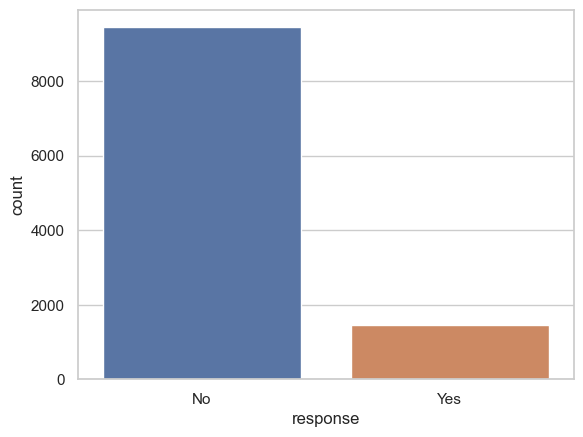

In [34]:
# countplot of responses
sns.set(style="whitegrid")
ax = sns.countplot(x='response', data=mdata)
plt.show() 

#

In [35]:
#creating response rate as a boolean series
mdata['response rate'] = mdata['response'] == 'Yes'
mdata.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month,response rate
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2,False
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1,False
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,False
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,True
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1,False


In [36]:
#forcing the response rate boolean to be a numeric value


#mdata['response rate'] =  pd.to_numeric(mdata['response rate'], errors='coerce')
mdata["response rate"] = mdata["response rate"].astype(int)
mdata.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,...,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type,month,response rate
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,M,2,0
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,M,1,0
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,0
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,M,1,0


In [37]:
mdata.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [38]:
mdata['income'].unique()
mdata['income'].value_counts()

0        2787
95697      15
60920      11
68931      10
11432      10
         ... 
45310       1
88055       1
74606       1
88043       1
64195       1
Name: income, Length: 5694, dtype: int64

In [39]:
mdata.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly premium auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,10910.0,14.444180,10.187488,0.000000,5.000000,13.000000,23.000000,35.000000
months since policy inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,10910.0,0.361962,0.890134,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
month,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000
response rate,10910.0,0.134372,0.341067,0.000000,0.000000,0.000000,0.000000,1.000000


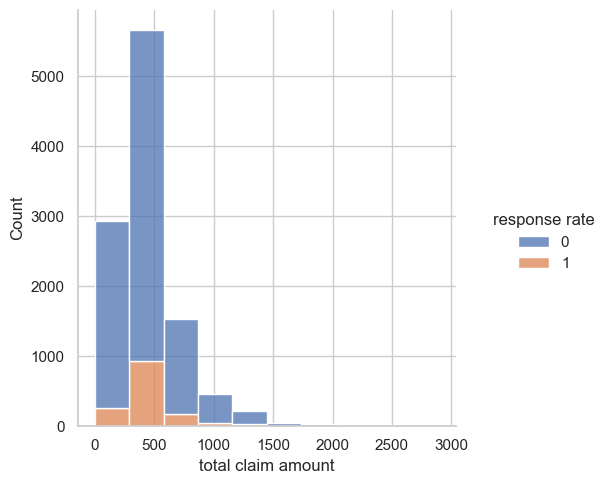

In [191]:
sns.displot(data=mdata, x ="total claim amount", hue="response rate", multiple="stack", bins=10)

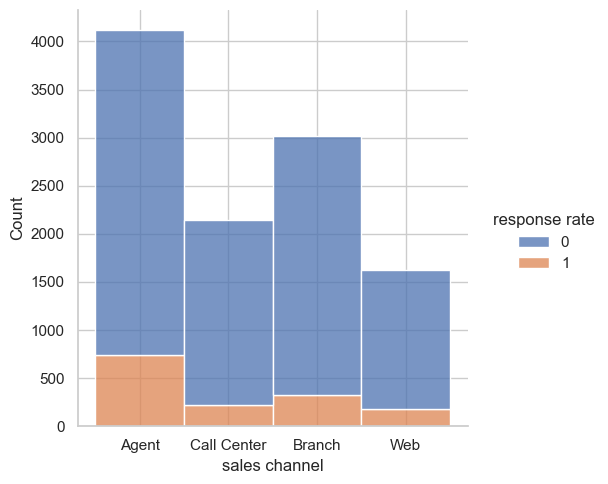

In [192]:
sns.displot(data=mdata, x ="sales channel", hue="response rate", multiple="stack", bins=10)

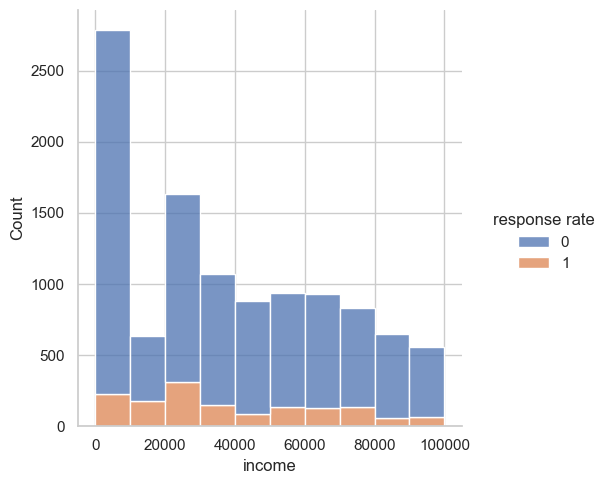

In [193]:
sns.displot(data=mdata, x ="income", hue="response rate", multiple="stack", bins=10)

# ROUND 4

In [40]:
#Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)


display(mdata.columns)
mdata.dtypes

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type', 'month',
       'response rate'],
      dtype='object')

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [48]:
import numpy as np
numerical = mdata.select_dtypes(np.number)
display(numerical)

categoricals = mdata.select_dtypes(np.object)
categoricals

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response rate
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2,0
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1,0
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,0
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1,1
4,9025.067525,23675,117,3.0,31,0.0,7,707.925645,1,0
...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,3.0,40,0.0,7,1214.400000,1,0
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1,0
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2,0
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2,0


/var/folders/x1/2c9504vx149bvy7bhmm_jn6m0000gp/T/ipykernel_64054/3583336682.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = mdata.select_dtypes(np.object)


,customer,state,response,coverage,education,employmentstatus,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size,vehicle type
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,M
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,M
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,M
10908,WA60547,California,No,Premium,College,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A


# Now we will try to check the normality of the numerical variables visually
#Use seaborn library to construct distribution plots for the numerical variables

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
numerical.describe().T
summary = numerical.describe().T

def roundforme(x):
    return round(x,2)
summary 

for col in summary.columns:
    summary[col] = summary[col].apply(roundforme)
summary

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10910.0,8018.24,6885.08,1898.01,4014.45,5771.15,8992.78,83325.38
income,10910.0,37536.28,30359.20,0.00,0.00,33813.50,62250.75,99981.00
monthly premium auto,10910.0,93.20,34.44,61.00,68.00,83.00,109.00,298.00
months since last claim,10910.0,14.44,10.19,0.00,5.00,13.00,23.00,35.00
months since policy inception,10910.0,48.09,27.94,0.00,24.00,48.00,71.00,99.00
number of open complaints,10910.0,0.36,0.89,0.00,0.00,0.00,0.00,5.00
number of policies,10910.0,2.98,2.40,1.00,1.00,2.00,4.00,9.00
total claim amount,10910.0,434.89,292.18,0.10,271.08,382.56,547.20,2893.24
month,10910.0,1.47,0.50,1.00,1.00,1.00,2.00,2.00
response rate,10910.0,0.13,0.34,0.00,0.00,0.00,0.00,1.00


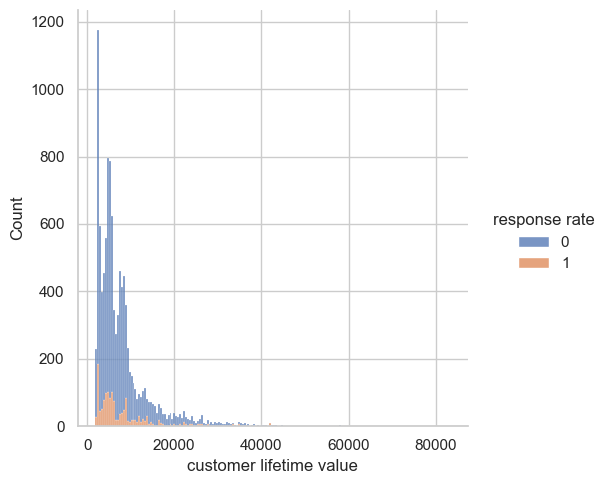

In [60]:
sns.displot(data= numerical, x ="customer lifetime value", hue="response rate", multiple="stack")
plt.show
sns.displot('income')

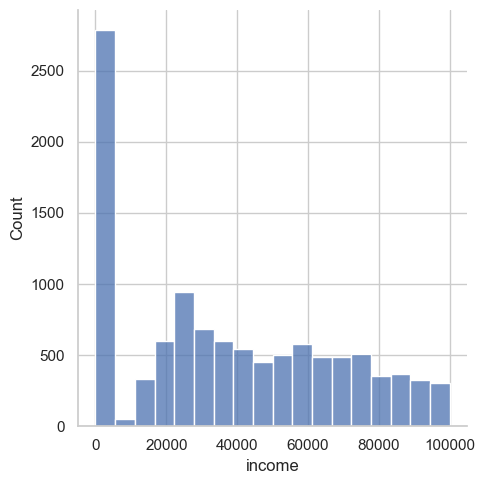

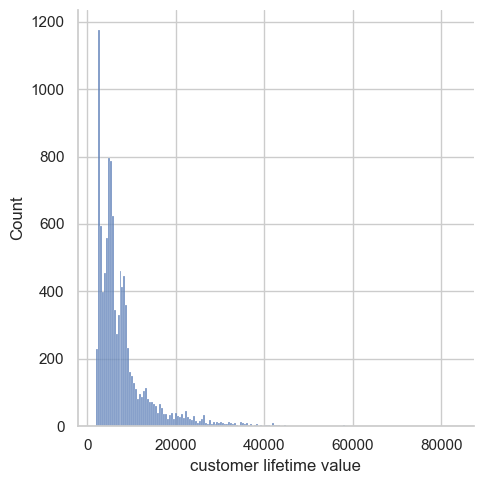

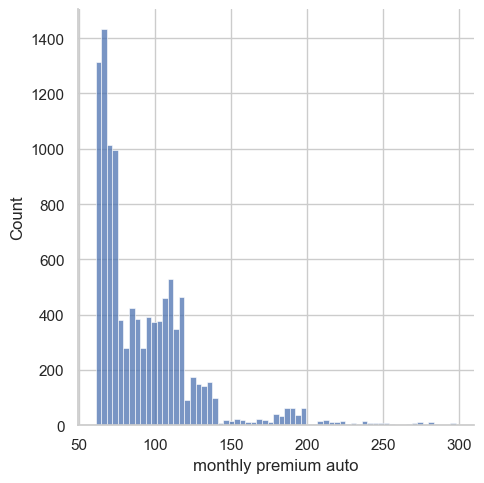

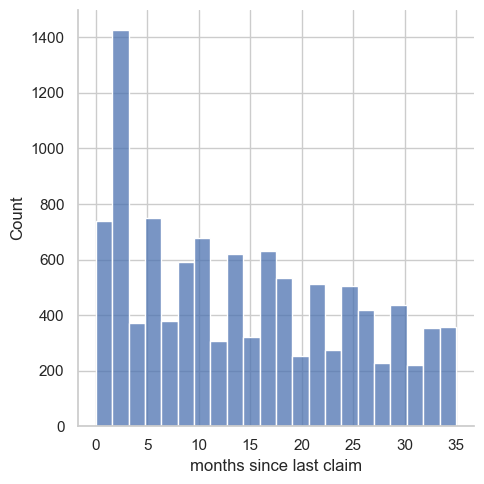

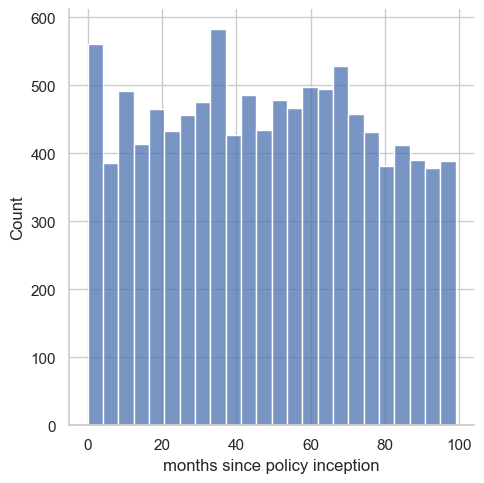

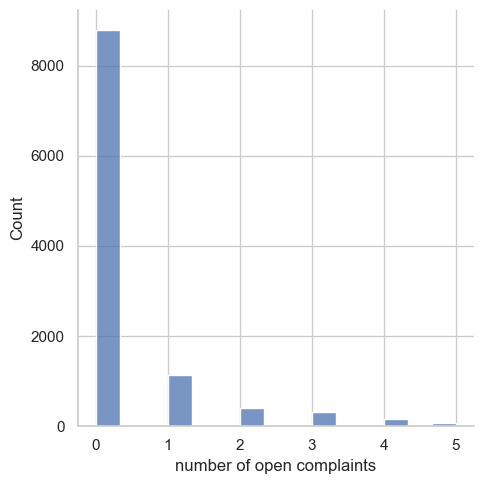

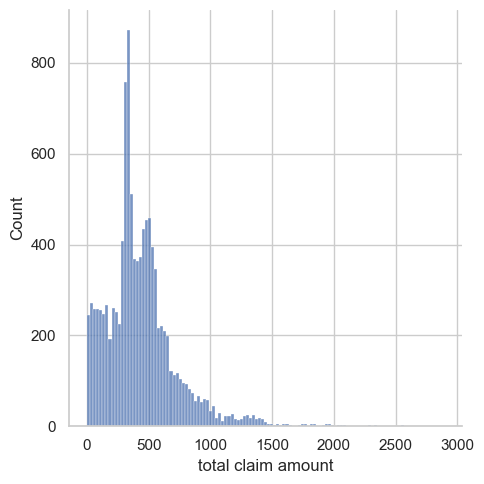

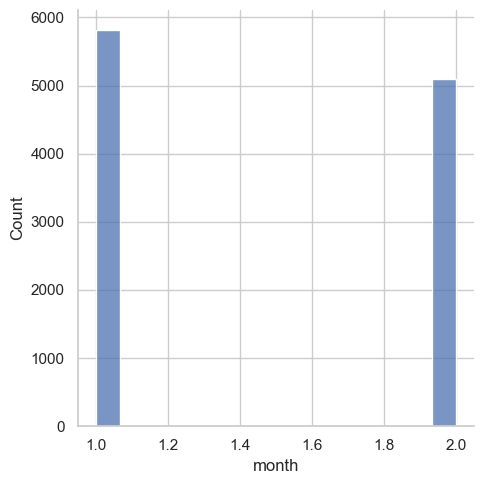

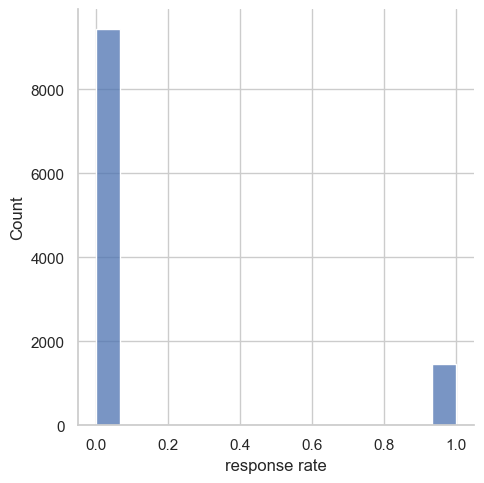

In [66]:
sns.displot(numerical['income'])
plt.show()
sns.displot(numerical['customer lifetime value'])
plt.show()
sns.displot(numerical['monthly premium auto'])
plt.show()
sns.displot(numerical['months since last claim'])
plt.show()
sns.displot(numerical['months since policy inception'])
plt.show()
sns.displot(numerical['number of open complaints'])
plt.show()
sns.displot(numerical['total claim amount'])
plt.show()
sns.displot(numerical['month'])
plt.show()
sns.displot(numerical['response rate'])
plt.show()

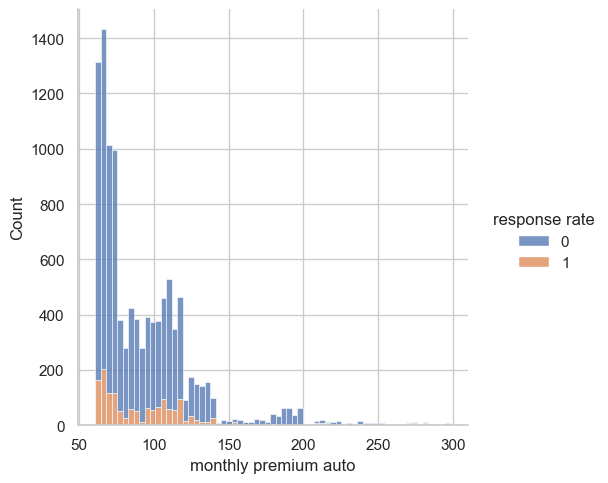

In [62]:
sns.displot(data= numerical, x ="monthly premium auto", hue="response rate", multiple="stack")


In [114]:
data = np.round(numerical, decimals=1)
data

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response rate
0,4809.2,48029,61,7.0,52,0.0,9,292.8,2,0
1,2228.5,0,64,3.0,26,0.0,1,744.9,1,0
2,14947.9,22139,100,34.0,31,0.0,2,480.0,2,0
3,22332.4,49078,97,10.0,3,0.0,2,484.0,1,1
4,9025.1,23675,117,3.0,31,0.0,7,707.9,1,0
...,...,...,...,...,...,...,...,...,...,...
10905,15563.4,0,253,3.0,40,0.0,7,1214.4,1,0
10906,5259.4,61146,65,7.0,68,0.0,6,273.0,1,0
10907,23893.3,39837,201,11.0,63,0.0,2,381.3,2,0
10908,11972.0,64195,158,0.0,27,4.0,6,618.3,2,0


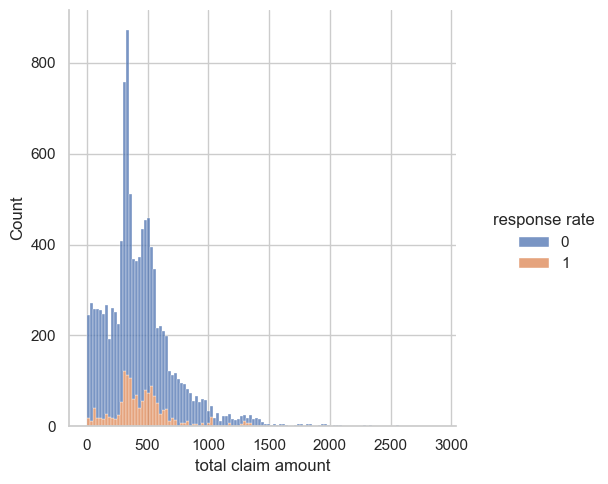

In [57]:
sns.displot(data= numerical, x ="total claim amount", hue="response rate", multiple="stack")


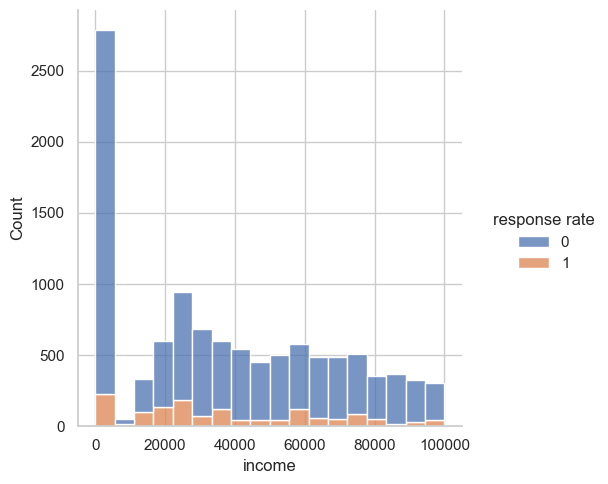

In [68]:
sns.displot(data= numerical, x ="income", hue="response rate", multiple="stack")


# Use Matplotlib to construct histograms


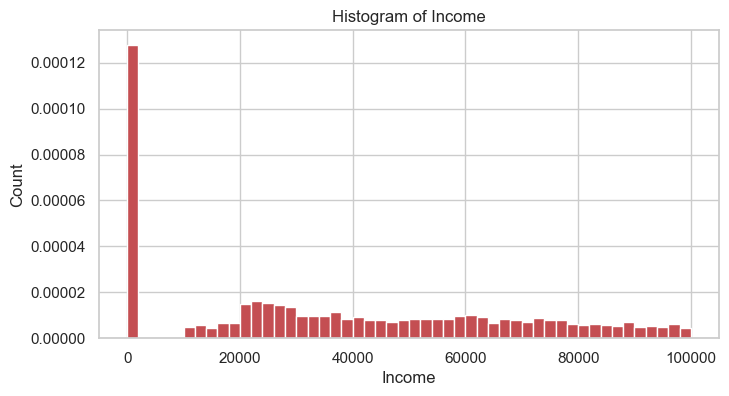

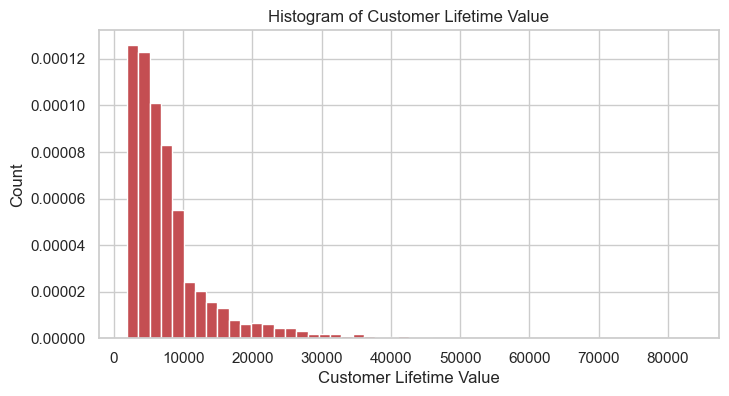

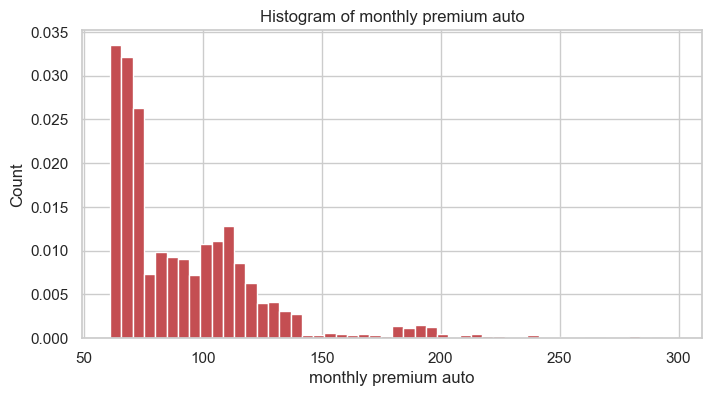

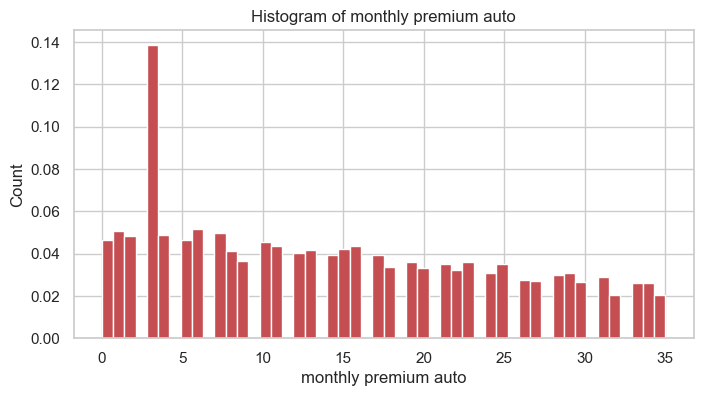

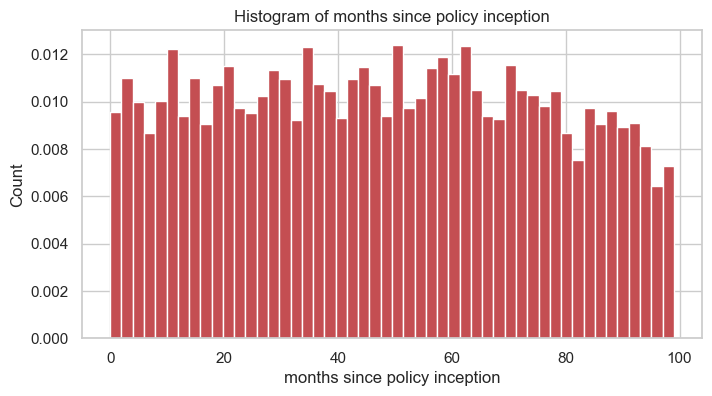

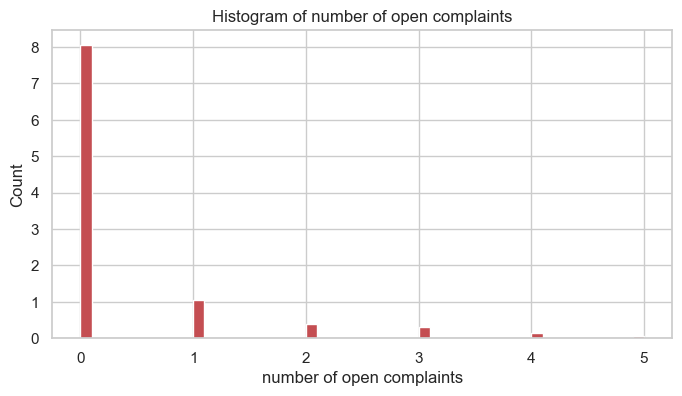

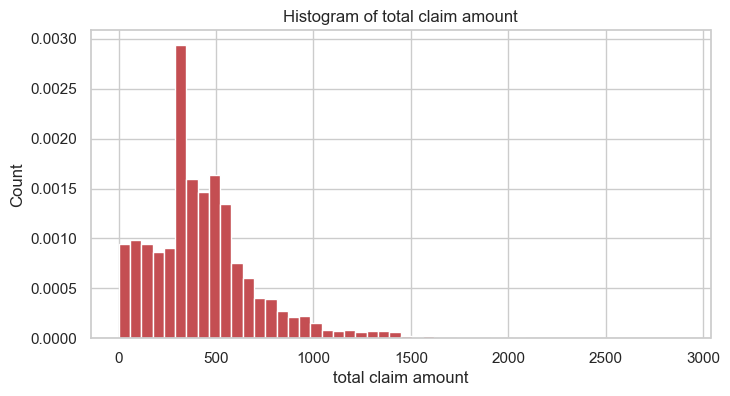

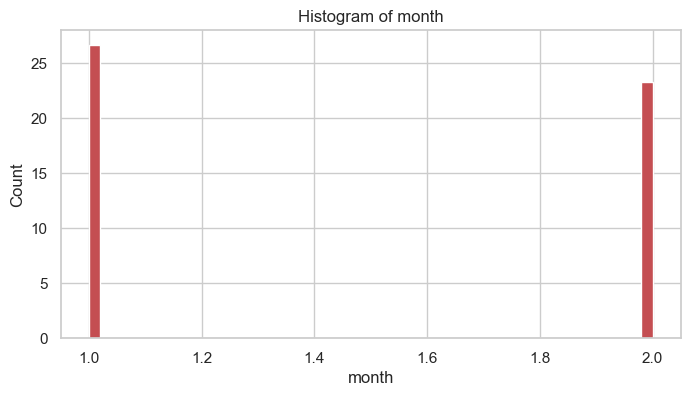

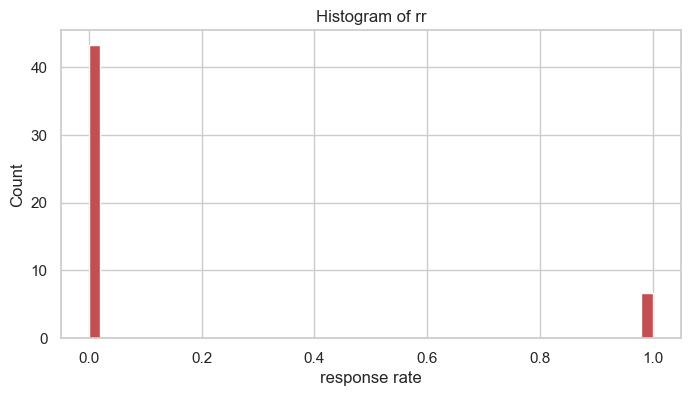

In [104]:
numerical.hist(column ='income', bins=50, density=True, facecolor='r',figsize=(8,4) )
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Histogram of Income')
plt.show()


numerical.hist(column ='customer lifetime value', bins=50, density=True, facecolor='r',figsize=(8,4))
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Count')
plt.title('Histogram of Customer Lifetime Value')
plt.show()

numerical.hist(column ='monthly premium auto', bins=50, density=True, facecolor='r',figsize=(8,4))
plt.xlabel('monthly premium auto')
plt.ylabel('Count')
plt.title('Histogram of monthly premium auto')
plt.show()


numerical.hist(column ='months since last claim', bins=50, density=True, facecolor='r',figsize=(8,4))
plt.xlabel('monthly premium auto')
plt.ylabel('Count')
plt.title('Histogram of monthly premium auto')
plt.show()


numerical.hist(column ='months since policy inception', bins=50, density=True, facecolor='r',figsize=(8,4))
plt.xlabel('months since policy inception')
plt.ylabel('Count')
plt.title('Histogram of months since policy inception')
plt.show()


numerical.hist(column ='number of open complaints', bins=50, density=True, facecolor='r',figsize=(8,4))
plt.xlabel('number of open complaints')
plt.ylabel('Count')
plt.title('Histogram of number of open complaints')
plt.show()

numerical.hist(column ='total claim amount', bins=50, density=True, facecolor='r',figsize=(8,4))
plt.xlabel('total claim amount')
plt.ylabel('Count')
plt.title('Histogram of total claim amount')
plt.show()


numerical.hist(column ='month', bins=50, density=True, facecolor='r',figsize=(8,4))
plt.xlabel('month')
plt.ylabel('Count')
plt.title('Histogram of month')
plt.show()


numerical.hist(column ='response rate', bins=50, density=True, facecolor='r',figsize=(8,4))
plt.xlabel('response rate')
plt.ylabel('Count')
plt.title('Histogram of rr')
plt.show()


In [ ]:
#Do the distributions for different numerical variables look like a normal distribution

#Yes, in some cases, a normal distribution of data can be seen.
#For example, we can see normal distributions for...the following variables
#Income, Customer Lifetime Value, Total Claim Amount, Months since policy inception & Monthly Premium Auto.   

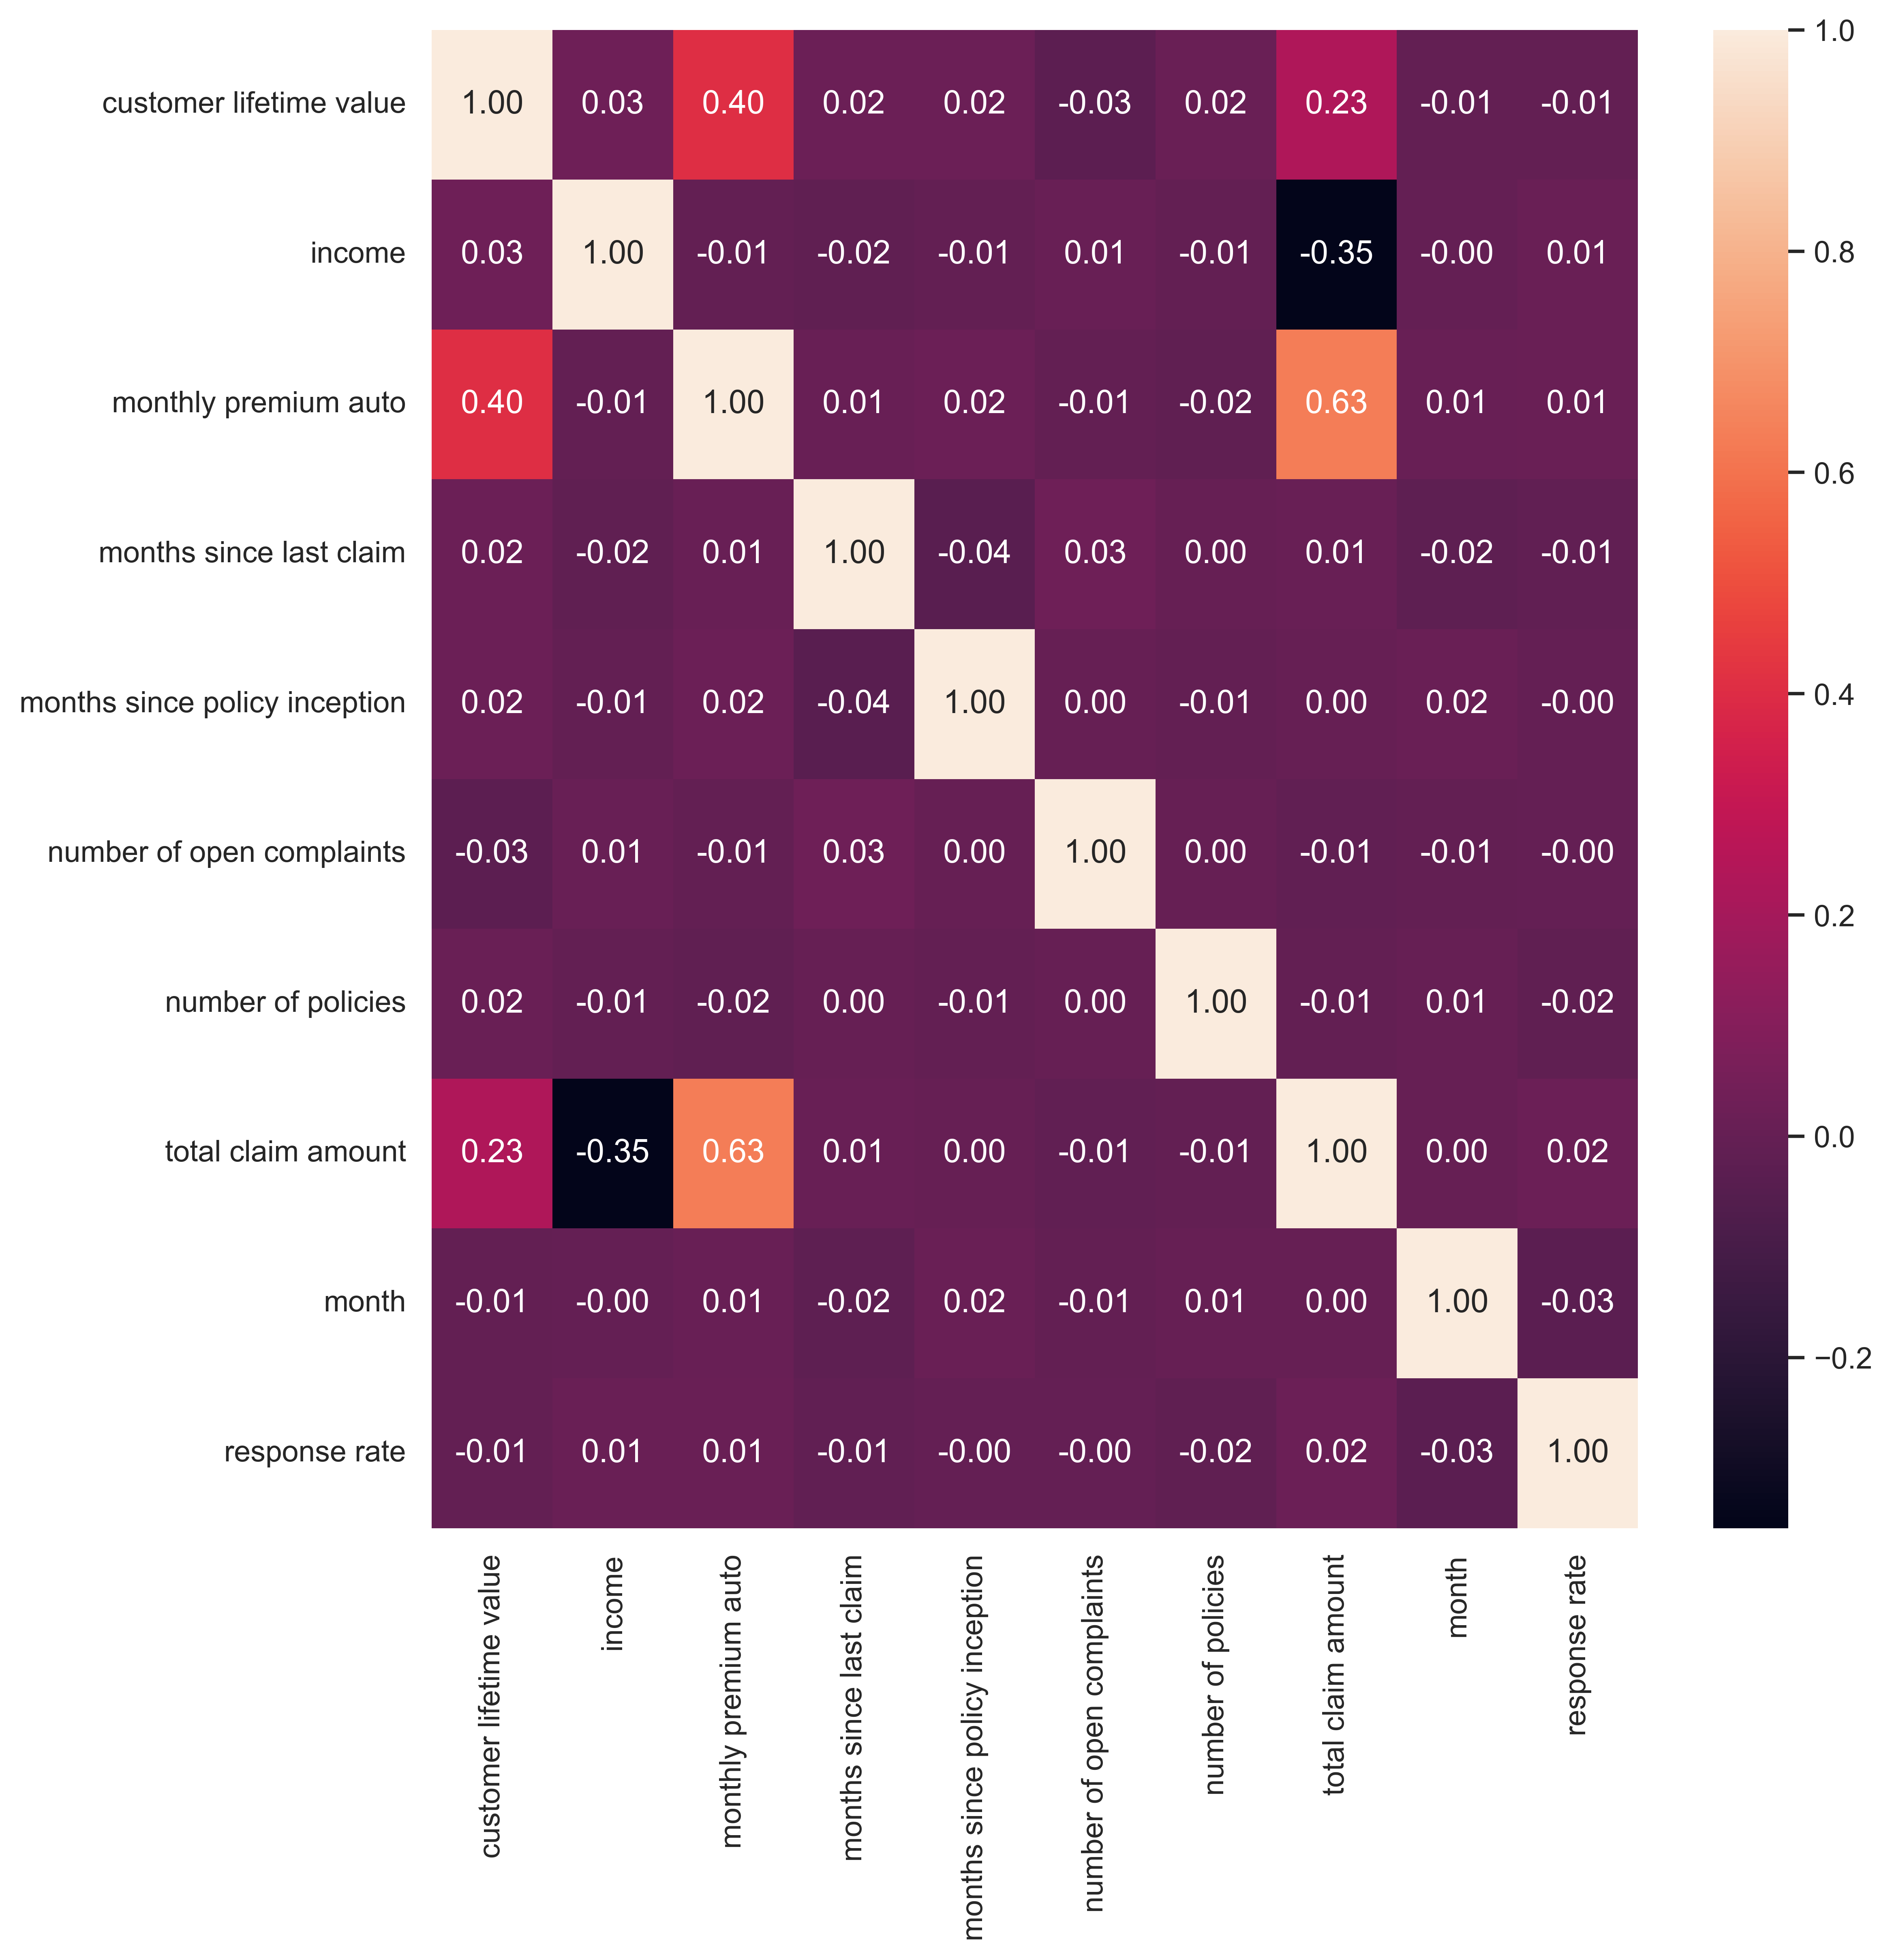

In [136]:

plt.figure(figsize=(10,10), dpi = 480)
sns.heatmap(numerical.corr(), annot = True, fmt = '.2f')
plt.show()

In [137]:
correlations_matrix

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response rate
customer lifetime value,1.000000,0.028306,0.403069,0.017062,0.016960,-0.030616,0.016024,0.232626,-0.009234,-0.007765
income,0.028306,1.000000,-0.009788,-0.018053,-0.005903,0.008425,-0.009960,-0.354141,-0.000443,0.011156
monthly premium auto,0.403069,-0.009788,1.000000,0.008043,0.018953,-0.010059,-0.020505,0.631799,0.007253,0.013918
months since last claim,0.017062,-0.018053,0.008043,1.000000,-0.036809,0.030285,0.000881,0.008327,-0.021782,-0.012378
months since policy inception,0.016960,-0.005903,0.018953,-0.036809,1.000000,0.004165,-0.009123,0.003095,0.015163,-0.004875
number of open complaints,-0.030616,0.008425,-0.010059,0.030285,0.004165,1.000000,0.001681,-0.012380,-0.005802,-0.004419
number of policies,0.016024,-0.009960,-0.020505,0.000881,-0.009123,0.001681,1.000000,-0.008923,0.005127,-0.018650
total claim amount,0.232626,-0.354141,0.631799,0.008327,0.003095,-0.012380,-0.008923,1.000000,0.001425,0.016416
month,-0.009234,-0.000443,0.007253,-0.021782,0.015163,-0.005802,0.005127,0.001425,1.000000,-0.032981
response rate,-0.007765,0.011156,0.013918,-0.012378,-0.004875,-0.004419,-0.018650,0.016416,-0.032981,1.000000


In [ ]:
## There is no multi coolinearity between variables. 

# Round 5 
# Processing Data

In [ ]:
# TARGET VARIABLE or LABEL or dependent variable = total claim amount
# the feature most highly coorelated to the label is the monthly premium auto, so we will first use this for an X-y split
# customer lifetime value is also coorelated to the label but not as highly related as monthly premium auto

In [138]:
numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly premium auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,10910.0,14.444180,10.187488,0.000000,5.000000,13.000000,23.000000,35.000000
months since policy inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,10910.0,0.361962,0.890134,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
month,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000
response rate,10910.0,0.134372,0.341067,0.000000,0.000000,0.000000,0.000000,1.000000


In [140]:
numerical['total claim amount'].corr(numerical['monthly premium auto'])


0.6317985607757723

In [164]:
numerical


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount,month,response rate
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2,0
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1,0
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2,0
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1,1
4,9025.067525,23675,117,3.0,31,0.0,7,707.925645,1,0
...,...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,3.0,40,0.0,7,1214.400000,1,0
10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1,0
10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2,0
10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849,2,0


In [162]:
y = numerical[['total claim amount']]
X = numerical[['monthly premium auto']]
y
X

,monthly premium auto
0,61
1,64
2,100
3,97
4,117
...,...
10905,253
10906,65
10907,201
10908,158


In [156]:
type(y)

pandas.core.frame.DataFrame

In [157]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [158]:
lm = linear_model.LinearRegression()

In [159]:
%%time
# we now "fit"the model in our data
lm.fit(X,y)
print("b0 = " , lm.intercept_)
print("b1 = " , lm.coef_) 

b0 =  [-64.60814048]
b1 =  [[5.35963084]]
CPU times: user 33.3 ms, sys: 23.8 ms, total: 57.1 ms
Wall time: 38.5 ms


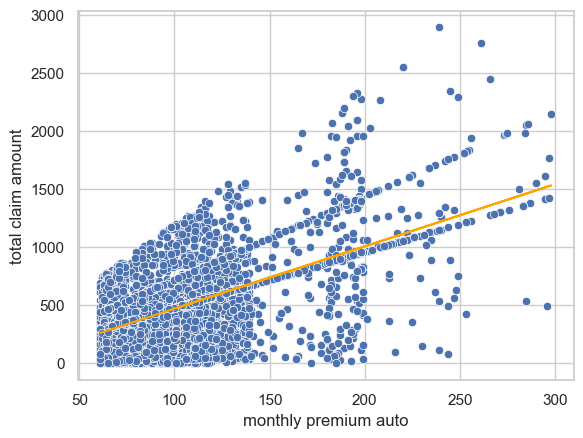

In [166]:
#let's visualize this result
regression_line = lm.intercept_ + lm.coef_[0]*numerical[['monthly premium auto']]
plt.plot(numerical[['monthly premium auto']], regression_line, c = 'orange')
sns.scatterplot(x='monthly premium auto',y='total claim amount',data=numerical)
plt.show()



In [179]:

# checking accuracy of our model
print("R2-score is ", lm.score(X,y))

y_pred = lm.predict(X)
print("mean squared error (MSE) is ", mean_squared_error(y_pred,y))
mean_squared_error(y_pred,y)

R2-score is  0.3991694213983369
mean squared error (MSE) is  51287.89100243998


51287.89100243998

In [176]:
%%time
#let's bring in more customer lifetime value as a feature 

y = numerical[['total claim amount']]
X2 = numerical[['customer lifetime value']]
lm2 = linear_model.LinearRegression()
lm2.fit(X2,y)
print(lm2.score(X2,y))
y_pred = lm2.predict(X2)
print(mean_squared_error(y_pred,y))
#results are not improving

0.054114857400877736
80742.31875374277
CPU times: user 33.1 ms, sys: 13.7 ms, total: 46.8 ms
Wall time: 14.7 ms


In [177]:
%%time
#let's bring in more variables

y = numerical[['total claim amount']]
X2 = numerical.drop(['total claim amount'], axis =1)
lm2 = linear_model.LinearRegression()
lm2.fit(X2,y)
print(lm2.score(X2,y))
y_pred = lm2.predict(X2)
print(mean_squared_error(y_pred,y))


#results are not improving, so we can assume that the feature monthly premium auto is the most related to the label.

0.5206690003352128
40916.486178372004
CPU times: user 40 ms, sys: 17.2 ms, total: 57.2 ms
Wall time: 21.2 ms


In [178]:
X2.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month,response rate
0,4809.216960,48029,61,7.0,52,0.0,9,2,0
1,2228.525238,0,64,3.0,26,0.0,1,1,0
2,14947.917300,22139,100,34.0,31,0.0,2,2,0
3,22332.439460,49078,97,10.0,3,0.0,2,1,1
4,9025.067525,23675,117,3.0,31,0.0,7,1,0


# Normalize (numerical).


In [185]:
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler

y = numerical[['total claim amount']]
X = numerical.drop(['total claim amount'], axis =1)
X_num = X.select_dtypes(include = np.number)

X_num

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month,response rate
0,4809.216960,48029,61,7.0,52,0.0,9,2,0
1,2228.525238,0,64,3.0,26,0.0,1,1,0
2,14947.917300,22139,100,34.0,31,0.0,2,2,0
3,22332.439460,49078,97,10.0,3,0.0,2,1,1
4,9025.067525,23675,117,3.0,31,0.0,7,1,0
...,...,...,...,...,...,...,...,...,...
10905,15563.369440,0,253,3.0,40,0.0,7,1,0
10906,5259.444853,61146,65,7.0,68,0.0,6,1,0
10907,23893.304100,39837,201,11.0,63,0.0,2,2,0
10908,11971.977650,64195,158,0.0,27,4.0,6,2,0


In [187]:
# Normalizing data: make data range from 0 - 1, instead of from min to max
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
pd.DataFrame(x_normalized, columns=X_num.columns)

(10910, 9)


,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month,response rate
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,1.0,0.0
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.0,0.0
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,1.0,0.0
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.0,1.0
4,0.087527,0.236795,0.236287,0.085714,0.313131,0.0,0.750,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10905,0.167823,0.000000,0.810127,0.085714,0.404040,0.0,0.750,0.0,0.0
10906,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.0,0.0
10907,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,1.0,0.0
10908,0.123717,0.642072,0.409283,0.000000,0.272727,0.8,0.625,1.0,0.0


In [189]:
a = pd.DataFrame(x_normalized, columns=X_num.columns).corr()
a

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,month,response rate
customer lifetime value,1.000000,0.028306,0.403069,0.017062,0.016960,-0.030616,0.016024,-0.009234,-0.007765
income,0.028306,1.000000,-0.009788,-0.018053,-0.005903,0.008425,-0.009960,-0.000443,0.011156
monthly premium auto,0.403069,-0.009788,1.000000,0.008043,0.018953,-0.010059,-0.020505,0.007253,0.013918
months since last claim,0.017062,-0.018053,0.008043,1.000000,-0.036809,0.030285,0.000881,-0.021782,-0.012378
months since policy inception,0.016960,-0.005903,0.018953,-0.036809,1.000000,0.004165,-0.009123,0.015163,-0.004875
number of open complaints,-0.030616,0.008425,-0.010059,0.030285,0.004165,1.000000,0.001681,-0.005802,-0.004419
number of policies,0.016024,-0.009960,-0.020505,0.000881,-0.009123,0.001681,1.000000,0.005127,-0.018650
month,-0.009234,-0.000443,0.007253,-0.021782,0.015163,-0.005802,0.005127,1.000000,-0.032981
response rate,-0.007765,0.011156,0.013918,-0.012378,-0.004875,-0.004419,-0.018650,-0.032981,1.000000
